In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import chebyt
from scipy.special import erf
from scipy.integrate import quad
from scipy.special import jve

from joblib import Parallel, delayed

In [36]:
#parameter set-up
fm = 5.067 
E = 50 * fm #E in GeV
z = 0.5
omega = E * z * (1 - z)
qF = 1.5 * fm ** 2
Omega = (1-1j) / 2 * np.sqrt(qF/omega)

#functions set up
def alpha(t2):

    return omega/t2

def V(t2):

    return -qF/12 * (z**2 + (1-z**2)) * t2 

def lambd(t2):

    return omega * Omega / 2 * 1 / np.tan(Omega * t2)

def w(t2):

    return 1j * (alpha(t2)/2 + lambd(t2))  + V(t2) / 4

def g(ux, uy, vx, vy, t2):

    return -1j * alpha(t2) * np.array([ux, uy]) + V(t2) / 4 * np.array([ux - vx, uy - vy])

def beta(t2):

    return np.real(lambd(t2))

def gamma(t2):

    return np.imag(lambd(t2))

def integrand(t2, ux, uy, vx, vy):
    term1 = np.exp(1j * alpha(t2) / 2 * (ux**2 + uy**2 - vx**2 - vy**2) + V(t2)/4 * ((ux - vx)**2 + (uy - vy)**2))
    term2 = alpha(t2)**2 / (4 * np.pi**2)
    g_vec = g(ux, uy, vx, vy, t2)
    term3 = np.exp(- (np.dot(g_vec, g_vec)) / (4 * w(t2)**2) ) 
    term4 = np.pi * V(t2) / (2 * w(t2))

    return -1j * omega / np.pi * term1 * term2 * term3 * term4

def integrand_Re(t2, ux, uy, vx, vy):

    return np.real(integrand(t2, ux, uy, vx, vy))

def integrand_Im(t2, ux, uy, vx, vy):

    return np.imag(integrand(t2, ux, uy, vx, vy))

In [37]:
quad(integrand_Re, 0, 0.5, args=(0, 0, 0, 0))
quad(integrand_Im, 0, 0.5, args=(0, 0, 0, 0))

(-0.43024674321021644, 4.776698405819695e-15)

In [38]:
def F(ux, uy, vx, vy, t):
    return quad(integrand_Re, 0, t, args=(ux, uy, vx, vy))[0] + 1j * (quad(integrand_Im, 0, t, args=(ux, uy, vx, vy))[0])

/tmp/ipykernel_27318/3058317303.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand_Re, 0, t, args=(ux, uy, vx, vy))[0] + 1j * (quad(integrand_Im, 0, t, args=(ux, uy, vx, vy))[0])
/tmp/ipykernel_27318/3058317303.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand_Re, 0, t, args=(ux, uy, vx, vy))[0] + 1j * (quad(integrand_Im, 0, t, args=(ux, uy, vx, vy))[0])


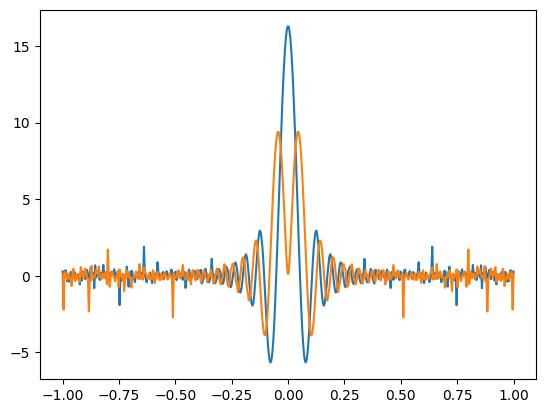

In [41]:
UX = np.linspace(-1, 1, 500)
F_ux = .0 * UX + 0j

for i_ux in range(len(UX)):
    F_ux[i_ux] = F(UX[i_ux], 0, 0, 0, 0.1)

plt.plot(UX, np.real(F_ux), label = "Real")
plt.plot(UX, np.imag(F_ux), label = "Imag")
plt.show()

/tmp/ipykernel_27318/3058317303.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand_Re, 0, t, args=(ux, uy, vx, vy))[0] + 1j * (quad(integrand_Im, 0, t, args=(ux, uy, vx, vy))[0])
/tmp/ipykernel_27318/3058317303.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand_Re, 0, t, args=(ux, uy, vx, vy))[0] + 1j * (quad(integrand_Im, 0, t, args=(ux, uy, vx, vy))[0])


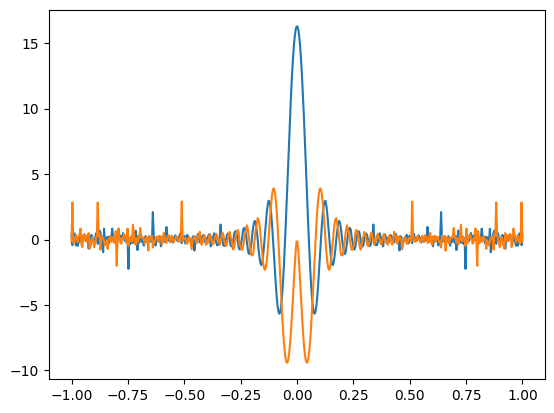

In [45]:
VX = np.linspace(-1, 1, 500)
F_vx = .0 * VX + 0j

for i_ux in range(len(VX)):
    F_vx[i_ux] = F(0, 0, VX[i_ux], 0, 0.1)

plt.plot(UX, np.real(F_vx), label = "Real")
plt.plot(UX, np.imag(F_vx), label = "Imag")
plt.show()